In [12]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from natasha import Segmenter, MorphVocab, NewsNERTagger, NewsEmbedding, NewsMorphTagger, Doc
from trajectories import trajectory_from_text
from ordec import entropy_complexity
from ordec_borders import *

wdict = np.load('../russian_dict_cbow.npy', allow_pickle=True).item()
wdict = {word: vec[-8:] for word, vec in wdict.items()}

In [32]:
def process_folder(folder_path, wdict, n, m, num_parts = 10):
    results = []
    for file_name in tqdm(os.listdir(folder_path), desc=folder_path):
        file_path = os.path.join(folder_path, file_name)
        if not os.path.isfile(file_path):
            continue
        
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            
        parts = split_text(text, num_parts=10)        
        for i, part in enumerate(parts):
            ts = trajectory_from_text(part, wdict, wdim=32)
            if ts is not None:
                ent, comp = entropy_complexity(ts, n=n, m=m)
                results.append({
                    'part': i + 1,
                    'entropy': ent,
                    'complexity': comp,
                    'text_type': folder_path.split('/')[-1],
                    'lang': 'ru',
                    'n': n,
                    'm': m
                })
    return results

def split_text(text, num_parts):
    words = text.split()
    part_size = len(words) // num_parts
    parts = []
    for i in range(num_parts):
        start = i * part_size
        end = (i + 1) * part_size if i < num_parts - 1 else None
        parts.append(" ".join(words[start:end]))
    return parts

pushkin:   0%|          | 0/4 [00:00<?, ?it/s]

lermontov:   0%|          | 0/5 [00:00<?, ?it/s]

slom:   0%|          | 0/4 [00:00<?, ?it/s]

gpt_jokes:   0%|          | 0/1 [00:00<?, ?it/s]

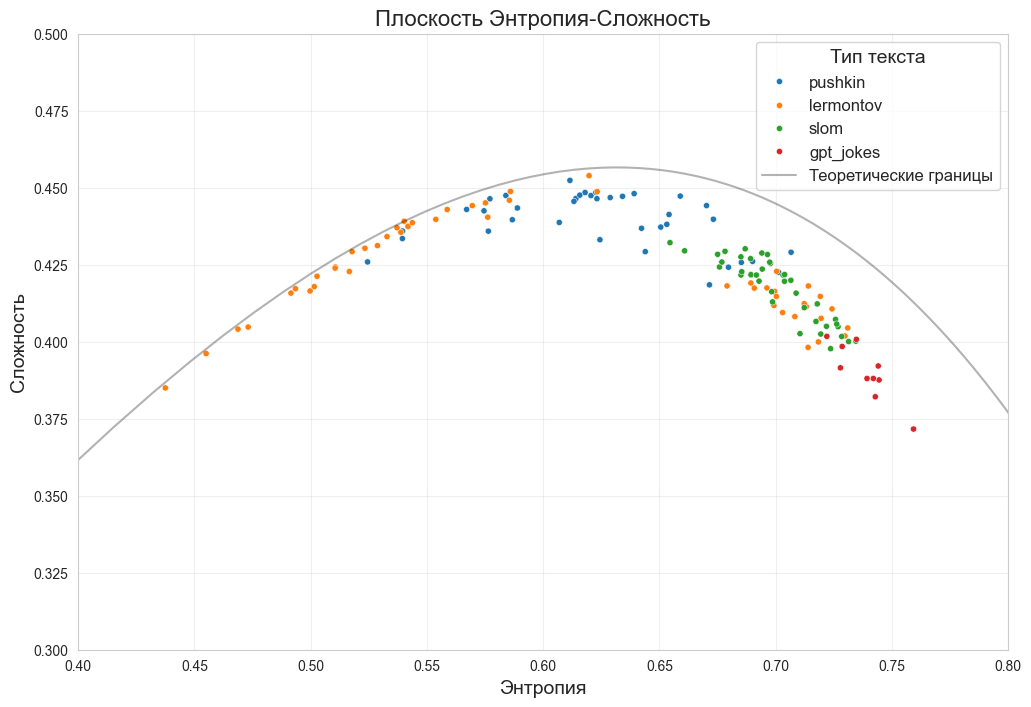

In [56]:
n, m = 2, 8

pushkin_results = process_folder('pushkin', wdict, n, m, 4)
lermontov_results = process_folder('lermontov', wdict, n, m, 4)
slom_results = process_folder('slom', wdict, n, m, 4)
gpt_jokes_results = process_folder('gpt_jokes', wdict, n, m, 14)

all_results = []
all_results.extend(pushkin_results)
all_results.extend(lermontov_results)
all_results.extend(slom_results)
all_results.extend(gpt_jokes_results)

results_df = pd.DataFrame(all_results)

min_ec, max_ec = get_borders(n, m)

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=results_df,
    x='entropy',
    y='complexity',
    hue='text_type',
    palette='tab10',
    s=20,
    legend='full'
)

sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color = 'black', label='Теоретические границы', alpha=0.3)
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color = 'black',alpha=0.3)

plt.title("Плоскость Энтропия-Сложность", fontsize=16)
plt.xlabel("Энтропия", fontsize=14)
plt.ylabel("Сложность", fontsize=14)
# plt.xlim(0.5, 0.8)
# plt.ylim(0.45, 0.52)
plt.xlim(0.4, 0.8)
plt.ylim(0.3, 0.5)
plt.legend(title="Тип текста", fontsize=12, title_fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [39]:
lerm = open('lermontov/parus.txt').read().split()
print(len(lerm))

60


In [49]:
hum = open('gpt_jokes/gpt_humor.txt').read().split()
print(len(hum))

695


In [50]:
hum = open('gpt_jokes/gpt_humor.txt').read().split('\n\n')
print(len(hum))

46


In [52]:
push = open('pushkin/lukomorie.txt').read().split()
print(len(push))

159
